Nesta atividade vocês irão aplicar os mesmos conceitos de validação cruzada, seleção de variáveis e regularização vistos em aula, mas agora em um modelo de classificação. 

## 1. Parte Teórica

### 1.1 Validação Cruzada (2 pontos)

a) Explique, usando suas palavras, quais as diferenças e vantagens em usar uma validação cruzada com 5 divisões (5-fold) para estimar o erro no conjunto de teste, quando comparado à validação simples, com 50% dos dados como conjunto de teste.

Considere aspectos como tempo de execução, variabilidade nas estimativas e viés do modelo treinado.

***Resposta:***


A **validação simples**, apesar de simples e fácil de executar, tem duas desvantagens: primeiro, a estimativa do erro de teste é muito variável dependendo de quais observações aparecem no conjunto de treinamento e quais aparecem no conjunto de validação; segundo, como apenas uma parte do conjunto de dados disponível é utilizada para treinar o modelo, isso pode fazer com que a estimação do erro de teste seja superestimada.

Ao utilizarmos a **validação cruzada** conseguimos suprir essas duas desvantagens da validação simples. Primeiro porque o método garante que todos os dados serão utilizados tanto para treinamento de modelos, quanto para estimar o erro de teste. No caso de $k=5$ (sendo $k$ o número de folds), ao todo cinco modelos serão treinados e testados. A estimativa final é dada pela media das estimativas de cada iteração do algoritmo. Assim, mesmo que executemos a validação cruzada diversas vezes, pela media, a variabilidade nas estimativas será menor do que na validação simples.  

Este método também diminui o viés do modelo treinado, dado que os modelos são treinados com 80% dos dados disponíveis, ao invés de apenas 50% da validação simples.

Em relação ao tempo de execução a validação cruzada é em média $k$ vezes mais demorada do que a validação simples.

b) Em um conjunto com 100 exemplos, quais as vantagens e desvantagens de usarmos a validação cruzada com 5 divisões com relação ao Leave-One-Out (LOO)?


***Resposta:***

**Vantagens da Validação Cruzada**
- No LOO teremos 100 modelos treinados, enquanto no CV teremos 5 modelos. Se o modelo utilizado for muito complexo, o LOO pode levar tempo demais de computação.


**Desvantagens**
- Os modelos utilizados em uma CV são treinados com menos dados do que os modelos treinados no LOO. Portanto, LOO gera resultados menos enviesados do que a CV
- (opcional) Ao rodar a CV múltiplas vezes, com diferentes sementes para divisão dos conjuntos de teste e validação, o resultado irá variar entre execuções. Já o LOO produz sempre o mesmo resultado. 

***Correção:*** O item marcado como opcional não precisa estar na resposta para ela ser considerada correta.

### 1.2 Seleção de Variáveis e Regularização (2 pontos)

a) Compare, usando suas palavras, a regressão ridge e a lasso. Discuta (i) sua formulação, (ii) o que ocorre com os coeficientes dos preditores e (iii) quando cada uma delas é vantajosa


***Resposta:***

O objetivo da **regressão ridge** é encontrar coeficientes $\beta$ que minimizem a soma dos quadradados dos resíduos, enquanto utiliza um penalizador que pode levar os valores dos coeficientes bem perto de zero. Sua fórmula utiliza dois termos: a soma dos quadrados dos resíduos (RSS) e uma penalidade de encolhimento, composta por um parametro de afinação $\lambda$ e a soma dos quadrados dos coeficientes (com exceção do $\beta_0$) : 

$$ RSS + \lambda \sum\limits_{j=1}^{p} \beta_{j}^{2}$$

Quando $\lambda = 0$ a penalidade perde efeito, ao passo que, quanto mais $\lambda$ tende ao infinito, mais os coeficientes se aproximam de zero. Porém, os coeficientes são exatamente iguais a zero apenas quando $\lambda = \infty$. E neste caso, todos os coeficientes serão iguais a zero, gerando um modelo sem preditores.

A regressão ridge funciona bem em situações onde a função resposta tem muito preditores e todos com coeficientes proximos de zero.


**Lasso:**

O objetivo da **lasso** é o mesmo da regressão ridge, encontrar coeficientes $\beta$ que minimizem a soma dos quadradados dos resíduos, enquanto utiliza um penalizador que pode levar os valores dos coeficientes bem perto de zero. Entretanto, a penalidade aplicada na lasso pode forçar a estimativa de alguns coeficientes a serem exatamente iguais a zero quando o parâmetro $\lambda$ for alto o suficiente. Sua fórmula é:

$$ RSS + \lambda \sum\limits_{j=1}^{p} |\beta_{j}|$$

A lasso gera modelos mais simples e interpretáveis, além de poder realizar selação de variáveis. É esperado que funcione melhor em casos onde poucos preditores tenham coeficientes significativos podendo ser igual a zero.

b) Compararemos a seleção de variáveis usando os métodos melhor subconjunto (best subset) e forward stepwise (incremental). 

No caso de um conjunto de dados com 20 preditores, e considerando que o tempo necessário para treinar e avaliar cada modelo gerado no conjunto de treino é *100ms*, qual será o tempo necessário rodar cada método de seleção de variáveis para todos os $k$ (tamnho dos subconjuntos de variáveis)? 

*No cálculo, não é preciso considerar o passo final do algoritmo de seleção, que é a etapa do uso de validação cruzada para seleção do $k$.* 

***Mostre e justifique as contas realizadas***.


***Resposta:***

**Best subset** 

Seguindo o livro, no best selection treinamos $2^p$ modelos no total, logo:


$ 2^{20} = 1.048.576 \text{ modelos} $

$ 1.048.576 * 100 \text{ ms} =  104.857,6 \text{ segundos}$

**Forward stepwise selection**

Seguindo o livro, no best selection treinamos $1 + \frac{p(p+2)}{2}$ modelos no total, logo:

$1 + \frac{20(20+2)}{2} = 1 + 10(22) = 221$ modelos

$ 221 * 100 \text{ ms} =  22,1 \text{ segundos}$


***Correção:*** Em casos de pequenas diferenças no resultado, como se um aluno considerar $p*(p-1)/2$ casos para o forward selection, ou $2^p-1$ casos no best subset, pode considerar correto.

***Atualização:*** O tempo para avaliar cada conjunto de treino é $100 \text{ ms}$ e não $200 \text{ ms}$ como estava anteriormente.

## 2. Parte Prática

Nesta parte faremos os mesmos passos de seleção de variáveis e regularização que fizemos com o modelo de regressão, mas agora aplicando um modelo de classificação ([Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

Utilizaremos o conjunto de Breast Cancer do scikit-lean ([link1](https://scikit-learn.org/stable/datasets/toy_dataset.html), [link2](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html))

Estes dados não vem normalizados. Para normalizá-los, utilize os comandos abaixo:

```
from sklearn.preprocessing import StandardScaler
X, y = load_breast_cancer(as_frame=True, return_X_y=True)
X1 = StandardScaler().fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)

```

### 2.1 Seleção de Variáveis com a Regressão Logística (2 pontos)

a) Crie uma função `AvaliaModelo`, que recebe como parâmetros o modelo de classificação treinado e os conjuntos de preditores e respostas, e devolve os seguintes erros: acurácia, precisão e cobertura. 

Em seguida teste a função. Para tal: (i) divida os dados do dataset em treino (80%) e validação (80%) e (ii) treine o modelo com dados de treinamento e imprima o desempenho do modelo (acurácia, precisão, cobertura e f-score) sobre os dados de treinamento e de teste. 

O F-score mede o equilíbrio entre precisão e cobertura e é uma das medidas mais utilizadas na área de aprendizado de máquina. 

`F1 = 2 * (precision * recall) / (precision + recall)`

Mas informações neste [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
X, y = load_breast_cancer(as_frame=True, return_X_y=True)
X1 = StandardScaler().fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)

In [ ]:
def calculaF1(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

def AvaliaModelo(model, X, y, printRes=True):
    y_pred = model.predict(X)
    
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = calculaF1(prec, recall)
   
    if printRes:
        print(f"Acurácia: {acc} \nPrecisão: {prec} \nCobertura: {recall} \nF1-score: {f1}")
    
    return acc, prec, recall, f1

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

print("Desempenho nos dados de treinamento")
acc, prec, recall, f1 = AvaliaModelo(clf, X_train, y_train)

print()
print("Desempenho nos dados de validação")
acc, prec, recall, f1 = AvaliaModelo(clf, X_validation, y_validation)

Desempenho nos dados de treinamento
Acurácia: 0.9868131868131869 
Precisão: 0.9861111111111112 
Cobertura: 0.993006993006993 
F1-score: 0.9895470383275262

Desempenho nos dados de validação
Acurácia: 0.9736842105263158 
Precisão: 0.9722222222222222 
Cobertura: 0.9859154929577465 
F1-score: 0.979020979020979


***Discussão:***

O modelo obteve bom desempenho para o conjunto de dados, acertanto tanto casos positivos, quanto casos negativos. Como esperado, a métricas na validação são menores do que no treinamento. 


b) Implemente uma função `selectBackward` que realiza a seleção retroativa. 

Em seguida, gere um gráfico contendo 4 linhas (acurácia, precisão e cobertura e f1-score), com o eixo x correspondendo ao número de preditores. Para gerar este gráfico, você deve usar a validação cruzada. Note que o atributo `scoring` pode receber os valores `f1`, `accuracy`, `precision`, e `recall`.

Em seguida, discuta os resultados, explicando qual número de preditores você escolheria e o motivo.

**Dica:** Para este exercício, você usar como base a função `selectForward` vista na aula 5.2 e o código para gerar os gráficos com validação cruzada. 


In [ ]:
from itertools import combinations
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def selectBackward(model, X,y):
    bwd_acc   = []
    bwd_pair  = []
    
    predictors = X.columns.to_list()
    for k in range(0, len(X.columns)):
        print(f"Execução {k+1}/{len(X.columns)}")
        
        if k == 30:
            import pdb; pdb.set_trace()
        acc_set  = []
        best = []
        pairs   = []
        if len(predictors) > 1:
            for i, comb in enumerate(combinations(predictors, len(predictors)-1)):
                #print(f"Combinação {i}/{len(predictors)-1}")
                pair = best + list(comb)
                model.fit(X[pair], y)       
                acc, _, _, _ = AvaliaModelo(model, X[pair], y, printRes = False)
                pairs.append(pair)
                acc_set.append(acc)

            # Escolhe a melhor
            best_pos = np.argmax(acc_set)    
            bwd_acc.append( acc_set[best_pos] )    
            best = pairs[best_pos]
            predictors = best
            bwd_pair.append( best )
        else:
            model.fit(X, y)       
            acc, _, _, _ = AvaliaModelo(model, X, y, printRes = False)
            bwd_acc.insert(0, acc)
            bwd_pair.insert(0, X.columns )
            
    return bwd_acc, bwd_pair


In [ ]:
best_acc, best_pair = selectBackward(LogisticRegression(max_iter=1000), X, y)

Execução 1/30
Execução 2/30
Execução 3/30
Execução 4/30
Execução 5/30
Execução 6/30
Execução 7/30
Execução 8/30
Execução 9/30
Execução 10/30
Execução 11/30
Execução 12/30
Execução 13/30
Execução 14/30
Execução 15/30
Execução 16/30
Execução 17/30
Execução 18/30
Execução 19/30
Execução 20/30
Execução 21/30
Execução 22/30
Execução 23/30
Execução 24/30
Execução 25/30
Execução 26/30
Execução 27/30
Execução 28/30
Execução 29/30
Execução 30/30


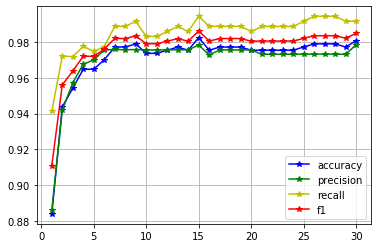

In [ ]:
best_acc_cv = []
best_prec_cv = []
best_recall_cv = []
best_f1_cv = []
for i in range(len(best_pair)):
    cv_results = cross_validate(LogisticRegression(max_iter=1000), 
                                X[best_pair[i]], 
                                y, 
                                cv=10, 
                                scoring=('accuracy','precision','recall','f1'))
    best_acc_cv.append( np.mean(cv_results['test_accuracy']) )
    best_prec_cv.append( np.mean(cv_results['test_precision']) )
    best_recall_cv.append( np.mean(cv_results['test_recall']) )
    best_f1_cv.append( np.mean(cv_results['test_f1']) )
plt.plot([len(pair) for pair in best_pair], best_acc_cv,"b*-", label='accuracy')
plt.plot([len(pair) for pair in best_pair], best_prec_cv,"g*-", label='precision')
plt.plot([len(pair) for pair in best_pair], best_recall_cv,"y*-", label='recall')
plt.plot([len(pair) for pair in best_pair], best_f1_cv,"r*-", label='f1')
plt.legend()
plt.grid()
plt.show()

***Discussão:***

Analisando o gráfico, vemos que com 7 preditores atingimos um nível de desempenho que pouco se altera quando adicionamos mais preditores, para as 4 métricas. Assim, este seria a melhor escolha, pois não temos muitos ganhos em deixar o modelo mais complexo.

***Correção:*** Os gráficos serão diferentes para cada aluno. Além disso, neste exemplo, se uma aluno tiver escolhido 9 ou 15 preditores, são escolhas razoáveis, pois estão nos valores máximos de algumas métricas. Neste caso, a resposta também estaria correta.



### 2.2 Regularização com a Regressão Logística (2 pontos)

a) Compare o uso das regressões ridge e lasso (l2 e l1) para diferentes valores de $\lambda$. Para tal, construa um gráfico contendo o valor de $\lambda$ na escala log no eixo x, e o F-score no eixo y. Use validação cruzada para gerar as estimativas.

Em seguida, discuta os resultados obtidos, qual método e $\lambda$ você escolheria e o motivo. 

**Dica:** Na classe `LogisticRegression` do scikit, o atributo `penalty` pode receber os valores `l1` ou `l2`. Além disso, a função recebe o atributo `C`, que é o inverso do parâmetro de regularização $\lambda$.

In [ ]:
from sklearn.linear_model import LogisticRegression

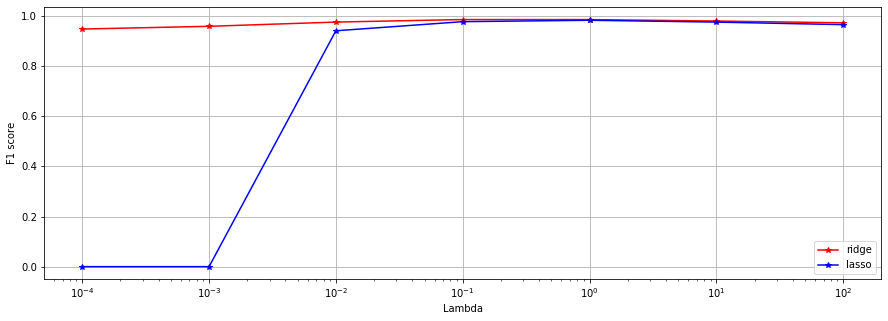

In [ ]:
ridge_l = []
lasso_l = []
lr_l = []

lambdas = [0.0001,0.001,0.01, 0.1, 1, 10, 100]
for l in lambdas:
    ridge = LogisticRegression(penalty='l2', C=l, max_iter=1000, solver='liblinear')
    lasso = LogisticRegression(penalty='l1', C=l, max_iter=1000, solver='liblinear')

    cv_results = cross_validate(ridge, X, y, cv=10, scoring=('f1'))
    ridge_l.append( np.mean(cv_results['test_score']))  

    cv_results = cross_validate(lasso, X, y, cv=10, scoring=('f1'))
    lasso_l.append( np.mean(cv_results['test_score']))

#plt.plot (ls, lr_l, '-*', label = 'lr')
plt.figure(figsize=(15,5))
plt.plot (lambdas, ridge_l, 'r-*',label = 'ridge')
plt.plot (lambdas, lasso_l, 'b-*',label = 'lasso')
plt.xlabel('Lambda')
plt.ylabel('F1 score')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [ ]:
lasso_l

[0.0,
 0.0,
 0.9413971219931048,
 0.9777284190488309,
 0.9833267156376149,
 0.9759593670898162,
 0.9658797179827415]

***Discussão:***

É importante observar que o parâmetro C é o inverso do parâmetro lambda, portanto, quanto menor o valor maior será o impacto da regularização. Percebe-se uma queda brusca no desempenho do modelo Lasso a partir de `C <= 0.001`, indicando que todas as variáveis foram filtradas, enquanto a penalização no Ridge acontece de maneira mais suavizada. Em todos os casos o Ridge tem um desempenho melhor do que o Lasso.

Para este problema, para ambos os tipos de regularização, se quisermos melhor desempenho devemos escolher `C=1`. Se desejarmos um modelo mais simples de explicar, `C=0.01`.


b) A regressão lasso (l1) possui um comportamento similar à seleção retroativa, pois começa com todos os preditores e vai eliminando-os à medida que a regularização aumenta.

Compare o modelo com k preditores que você escolheu no exercício 2.1(b), com o lasso com $\lambda$ escolhido no exercício 2.2(a). 

Verifique e indique quais foram as variáveis removidas em cada modelo (no lasso, veja quais variáveis ficaram com coeficiente zero).

Discutas as diferenças e similares nos resultados gerados pelos modelos em termos de desempenho e variáveis mantidas vs removidas.



In [ ]:
# Checando coeficientes criados pelo algoritmo Lasso

lasso = LogisticRegression(penalty='l1', C=0.01, max_iter=1000, solver='liblinear')
lasso.fit(X,y)

print("Variaveis não excluidas:", np.where(lasso.coef_[0] != 0)[0], "=>", X.columns[[7, 20, 22, 27]].values)

Variaveis não excluidas: [ 7 20 22 27] => ['mean concave points' 'worst radius' 'worst perimeter'
 'worst concave points']


***Discussão:***

Na seleção retroativa de variáveis vemos que é possível obter um desempenho adequado mesmo com poucas variáveis. De fato, quando `C=0.01` o lasso obtem uma performance média de 94.13% utilizando quatro variáveis com coeficientes diferente de zero: `['mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']`, enquanto o algoritmo de seleção retroativa consegue um desempenho de 97.19% quando utiliza quatro variáveis, que são `['mean texture', 'mean perimeter', 'worst smoothness', 'worst concavity']`.

Assim, se o objetivo for deixar poucas variáveis, nesta comparação o melhor seria usar a seleção retroativa.



### 2.3 Regressão Logística com Elastic Net (2 pontos)

É possível colocar as penalidade L1 e L2 em um mesmo modelo. Neste caso, chamamos o modelo de ElasticNet. Na classe `LogisticRegression` do scikit ele pode ser ativado passando o atributo `penalty='elasticnet'`

Note que agora temos 2 atributos relativos à regularização, o `C`, usado no item 2.2(a) e `l1_ratio`, que indica se a regularização é mais forte na penalidade `L1` (valores próximos de 1), ou da `L2` (valores mais próximos de 0).

a) Execute o modelo da elasticnet com 5 diferentes combinações de valores `C` e `l1_ratio`, e imprima os erros `f1`, `accuracy`, `precision`, e `recall` usando validação cruzada.


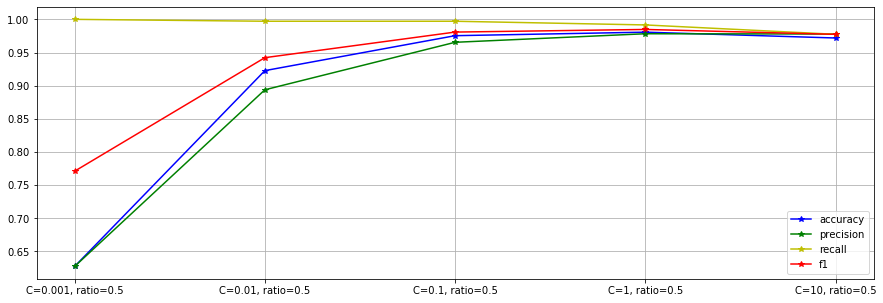

In [ ]:
acc_cv = []
prec_cv = []
recall_cv = []
f1_cv = []

combinations = [(0.001, 0.5), (0.01, 0.5), (0.1, 0.5), (1, 0.5), (10, 0.5)]
for (c, ratio) in combinations:
    model = LogisticRegression(penalty='elasticnet', C=c, l1_ratio=ratio, max_iter=10000, solver='saga')

    cv_results = cross_validate(model, X, y, cv=10, scoring=('accuracy','precision','recall','f1'))
    acc_cv.append( np.mean(cv_results['test_accuracy']))
    recall_cv.append( np.mean(cv_results['test_recall']))
    prec_cv.append( np.mean(cv_results['test_precision']))
    f1_cv.append( np.mean(cv_results['test_f1']))

x_label = [f"C={i[0]}, ratio={i[1]}" for i in combinations]
plt.figure(figsize=(15,5))
plt.plot(x_label, acc_cv,"b*-", label='accuracy')
plt.plot(x_label, prec_cv,"g*-", label='precision')
plt.plot(x_label, recall_cv,"y*-", label='recall')
plt.plot(x_label, f1_cv,"r*-", label='f1')
plt.legend()
plt.grid()
plt.show()

b) Avaliaremos agora o desempenho da elasticnet com diferentes valores para `C` e `l1_ratio`. 

Para tal, gere um único gráfico contendo os F-score no eixo Y e o valor de `C` no eixo X em escala log. O gráfico deverá conter 5 curvas, para valores de `l1_ratio` iguais a `[0, 0.25, 0.5, 0.75, 1.0]`.


Em seguida, discuta os resultados, explicando quais valores vocês escolheria para os parâmetros e o motivo.

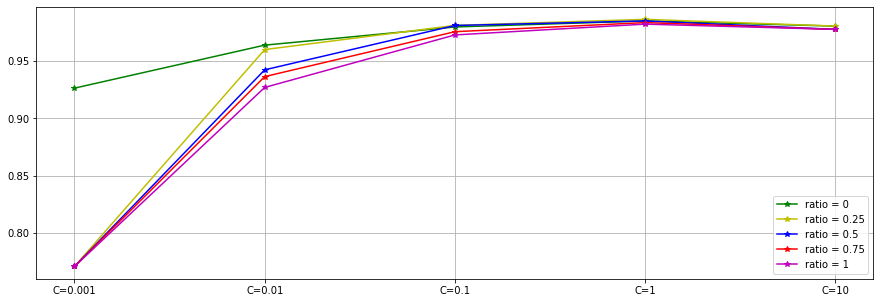

In [ ]:
ratio = [0, 0.25, 0.5, 0.75, 1.0]
f1_0 = []
f1_1 = []
f1_2 = []
f1_3 = []
f1_4 = []

combinations = [0.001, 0.01, 0.1, 1, 10]
for c in combinations:
    model = LogisticRegression(penalty='elasticnet', C=c, l1_ratio=ratio[0], max_iter=10000, solver='saga')
    cv_results = cross_validate(model, X, y, cv=10, scoring=('f1'))
    f1_0.append( np.mean(cv_results['test_score']))
    
    model = LogisticRegression(penalty='elasticnet', C=c, l1_ratio=ratio[1], max_iter=10000, solver='saga')
    cv_results = cross_validate(model, X, y, cv=10, scoring=('f1'))
    f1_1.append( np.mean(cv_results['test_score']))
    
    model = LogisticRegression(penalty='elasticnet', C=c, l1_ratio=ratio[2], max_iter=10000, solver='saga')
    cv_results = cross_validate(model, X, y, cv=10, scoring=('f1'))
    f1_2.append( np.mean(cv_results['test_score']))
    
    model = LogisticRegression(penalty='elasticnet', C=c, l1_ratio=ratio[3], max_iter=10000, solver='saga')
    cv_results = cross_validate(model, X, y, cv=10, scoring=('f1'))
    f1_3.append( np.mean(cv_results['test_score']))
    
    model = LogisticRegression(penalty='elasticnet', C=c, l1_ratio=ratio[4], max_iter=10000, solver='saga')
    cv_results = cross_validate(model, X, y, cv=10, scoring=('f1'))
    f1_4.append( np.mean(cv_results['test_score']))

x_label = [f"C={i}" for i in combinations]
plt.figure(figsize=(15,5))
plt.plot(x_label, f1_0,"g*-", label='ratio = 0')
plt.plot(x_label, f1_1,"y*-", label='ratio = 0.25')
plt.plot(x_label, f1_2,"b*-", label='ratio = 0.5')
plt.plot(x_label, f1_3,"r*-", label='ratio = 0.75')
plt.plot(x_label, f1_4,"m*-", label='ratio = 1')
plt.legend()
plt.grid()
plt.show()

***Discussão:*** Vemos aqui que o melhor resultado ocorreu com o fator de regularização C=1. O ratio influi muito pouco no resultado, com o erro ficando levemente menor para um ratio de 0.25. Mas na prática, qualquer ratio funcionaria bem aqui. 

Com regularizações mais fortes, o desempenho com ratio maior (maior ênfase na L1), ficou pior, indicando que a regularização L2 funciona melhor, o que é compatível com o que vimos no exercício 2.2.